<a href="https://colab.research.google.com/github/venujala/700766038/blob/main/icp6_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Use Image Classification on the hand written digits data set (mnist)

from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

11490434/11490434 [==============================] - 0s 0us/step
(28, 28)
784
Epoch 1/10
235/235 [==============================] - 16s 61ms/step - loss: 0.2923 - accuracy: 0.9111 - val_loss: 0.1271 - val_accuracy: 0.9597
Epoch 2/10
235/235 [==============================] - 10s 41ms/step - loss: 0.1017 - accuracy: 0.9691 - val_loss: 0.1310 - val_accuracy: 0.9594
Epoch 3/10
235/235 [==============================] - 11s 49ms/step - loss: 0.0648 - accuracy: 0.9801 - val_loss: 0.0947 - val_accuracy: 0.9695
Epoch 4/10
235/235 [==============================] - 11s 47ms/step - loss: 0.0439 - accuracy: 0.9857 - val_loss: 0.0753 - val_accuracy: 0.9762
Epoch 5/10
235/235 [==============================] - 10s 43ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0594 - val_accuracy: 0.9824
Epoch 6/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0722 - val_accuracy: 0.9777
Epoch 7/10
235/235 [==============================] - 6s 26

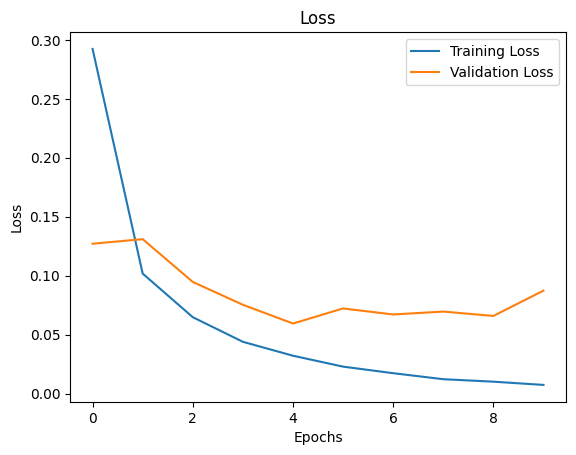

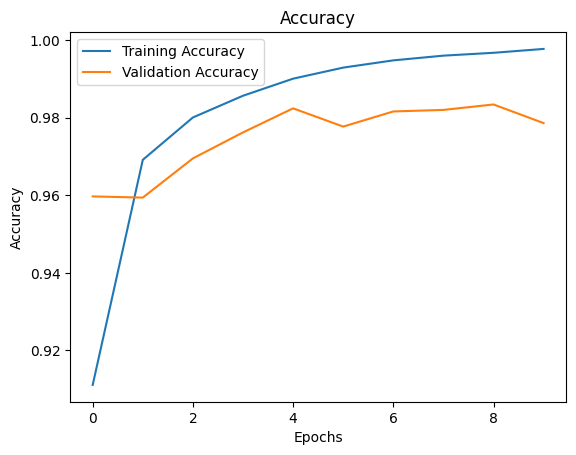

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

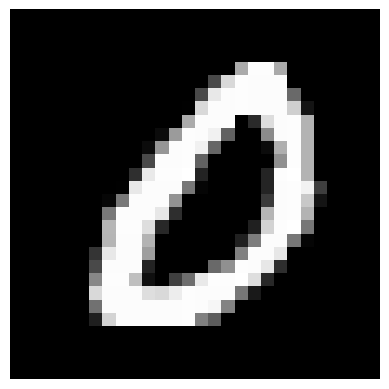

1/1 [==============================] - 0s 97ms/step
Predicted label: 0


In [ ]:
# Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image

import matplotlib.pyplot as plt

# Select a random image from the test data
index = np.random.randint(0, test_data.shape[0])
image = test_data[index].reshape(28, 28)  # Reshape the flattened image to its original shape

# Plot the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Perform inference on the selected image
prediction = model.predict(np.expand_dims(test_data[index], axis=0))
predicted_label = np.argmax(prediction)

print("Predicted label:", predicted_label)

In [ ]:
# Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens.

from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
# Process the data
# 1. Convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

# Convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
# Scale data
train_data /= 255.0
test_data /= 255.0
# Change the labels from integer to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Creating network
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))  # Updated activation to tanh
model.add(Dense(256, activation='sigmoid'))  # Added an additional hidden layer with sigmoid activation
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                    validation_data=(test_data, test_labels_one_hot))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 6s 23ms/step - loss: 0.4134 - accuracy: 0.8855 - val_loss: 0.2453 - val_accuracy: 0.9293
Epoch 2/10
235/235 [==============================] - 4s 18ms/step - loss: 0.2105 - accuracy: 0.9382 - val_loss: 0.1850 - val_accuracy: 0.9451
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1528 - accuracy: 0.9548 - val_loss: 0.1340 - val_accuracy: 0.9601
Epoch 4/10
235/235 [==============================] - 5s 22ms/step - loss: 0.1187 - accuracy: 0.9648 - val_loss: 0.1533 - val_accuracy: 0.9495
Epoch 5/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0956 - accuracy: 0.9711 - val_loss: 0.1038 - val_accuracy: 0.9679
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0780 - accuracy: 0.9768 - val_loss: 0.1162 - val_accuracy: 0.9612
Epoch 7/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0644 - accuracy: 0.9805 - val_loss: 0.0810 - val_acc

In [ ]:
# Run the same code without scaling the images and check the performance?

from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
# Process the data
# 1. Convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

# Convert data to float
train_data = train_data.astype('float')
test_data = test_data.astype('float')

# Change the labels from integer to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                    validation_data=(test_data, test_labels_one_hot))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 6s 23ms/step - loss: 5.5992 - accuracy: 0.8809 - val_loss: 1.0159 - val_accuracy: 0.9071
Epoch 2/10
235/235 [==============================] - 6s 24ms/step - loss: 0.4335 - accuracy: 0.9469 - val_loss: 0.4309 - val_accuracy: 0.9373
Epoch 3/10
235/235 [==============================] - 5s 21ms/step - loss: 0.2608 - accuracy: 0.9605 - val_loss: 0.4153 - val_accuracy: 0.9435
Epoch 4/10
235/235 [==============================] - 6s 27ms/step - loss: 0.2049 - accuracy: 0.9668 - val_loss: 0.5114 - val_accuracy: 0.9365
Epoch 5/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1744 - accuracy: 0.9715 - val_loss: 0.3994 - val_accuracy: 0.9531
Epoch 6/10
235/235 [==============================] - 6s 27ms/step - loss: 0.1593 - accuracy: 0.9745 - val_loss: 0.3728 - val_accuracy: 0.9562
Epoch 7/10
235/235 [==============================] - 5s 22ms/step - loss: 0.1480 - accuracy: 0.9790 - val_loss: 0.3620 - val_acc